In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print("seed",seed)
print("cfg_env",cfg_env)

seed 1


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(6026.6948)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 48


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 474.14897  validloss 560.74474±0.00000  bestvalidloss 560.74474  last_update 0
train: iter 1  trainloss 376.29080  validloss 324.25260±0.00000  bestvalidloss 324.25260  last_update 0
train: iter 2  trainloss 253.38211  validloss 278.54825±0.00000  bestvalidloss 278.54825  last_update 0
train: iter 3  trainloss 171.48385  validloss 205.30947±0.00000  bestvalidloss 205.30947  last_update 0
train: iter 4  trainloss 165.27092  validloss 95.97467±0.00000  bestvalidloss 95.97467  last_update 0
train: iter 5  trainloss 42.45579  validloss 26.57388±0.00000  bestvalidloss 26.57388  last_update 0
train: iter 6  trainloss -16.79553  validloss -41.87044±0.00000  bestvalidloss -41.87044  last_update 0
train: iter 7  trainloss -47.86424  validloss -45.53763±0.00000  bestvalidloss -45.53763  last_update 0
train: iter 8  trainloss -98.23907  validloss -100.55161±0.00000  bestvalidloss -100.55161  last_update 0
train: iter 9  trainloss -90.27027  validloss -1

train: iter 77  trainloss -558.19969  validloss -457.33210±0.00000  bestvalidloss -639.79967  last_update 1
train: iter 78  trainloss -559.16608  validloss -636.02401±0.00000  bestvalidloss -639.79967  last_update 2
train: iter 79  trainloss -516.00439  validloss -612.51650±0.00000  bestvalidloss -639.79967  last_update 3
train: iter 80  trainloss -566.15657  validloss -504.12751±0.00000  bestvalidloss -639.79967  last_update 4
train: iter 81  trainloss -570.55839  validloss -617.12020±0.00000  bestvalidloss -639.79967  last_update 5
train: iter 82  trainloss -551.09998  validloss -622.49608±0.00000  bestvalidloss -639.79967  last_update 6
train: iter 83  trainloss -567.96779  validloss -620.15903±0.00000  bestvalidloss -639.79967  last_update 7
train: iter 84  trainloss -585.24704  validloss -670.53786±0.00000  bestvalidloss -670.53786  last_update 0
train: iter 85  trainloss -579.77685  validloss -656.91339±0.00000  bestvalidloss -670.53786  last_update 1
train: iter 86  trainloss -5

train: iter 153  trainloss -646.71854  validloss -575.57371±0.00000  bestvalidloss -704.22819  last_update 22
train: iter 154  trainloss -613.71099  validloss -677.44623±0.00000  bestvalidloss -704.22819  last_update 23
train: iter 155  trainloss -609.69886  validloss -210.74376±0.00000  bestvalidloss -704.22819  last_update 24
train: iter 156  trainloss -637.36167  validloss 210.53202±0.00000  bestvalidloss -704.22819  last_update 25
train: iter 157  trainloss -630.45952  validloss -684.68681±0.00000  bestvalidloss -704.22819  last_update 26
train: iter 158  trainloss -650.98472  validloss -630.26542±0.00000  bestvalidloss -704.22819  last_update 27
train: iter 159  trainloss -630.21019  validloss -609.37931±0.00000  bestvalidloss -704.22819  last_update 28
train: iter 160  trainloss -645.44161  validloss -648.09337±0.00000  bestvalidloss -704.22819  last_update 29
train: iter 161  trainloss -640.06622  validloss -632.43619±0.00000  bestvalidloss -704.22819  last_update 30
train: iter

train: iter 228  trainloss -677.28154  validloss -732.22001±0.00000  bestvalidloss -736.36295  last_update 4
train: iter 229  trainloss -646.82007  validloss -730.31190±0.00000  bestvalidloss -736.36295  last_update 5
train: iter 230  trainloss -669.30791  validloss -702.79380±0.00000  bestvalidloss -736.36295  last_update 6
train: iter 231  trainloss -669.06467  validloss -710.93931±0.00000  bestvalidloss -736.36295  last_update 7
train: iter 232  trainloss -664.54010  validloss -723.96755±0.00000  bestvalidloss -736.36295  last_update 8
train: iter 233  trainloss -661.12741  validloss -712.54719±0.00000  bestvalidloss -736.36295  last_update 9
train: iter 234  trainloss -621.81423  validloss -703.14107±0.00000  bestvalidloss -736.36295  last_update 10
train: iter 235  trainloss -642.03377  validloss -613.51723±0.00000  bestvalidloss -736.36295  last_update 11
train: iter 236  trainloss -650.63494  validloss -690.35701±0.00000  bestvalidloss -736.36295  last_update 12
train: iter 237 

train: iter 303  trainloss -685.68935  validloss -688.77150±0.00000  bestvalidloss -744.50490  last_update 7
train: iter 304  trainloss -675.48520  validloss -628.98736±0.00000  bestvalidloss -744.50490  last_update 8
train: iter 305  trainloss -651.26471  validloss -695.98087±0.00000  bestvalidloss -744.50490  last_update 9
train: iter 306  trainloss -672.54858  validloss -735.19574±0.00000  bestvalidloss -744.50490  last_update 10
train: iter 307  trainloss -608.20431  validloss -740.82621±0.00000  bestvalidloss -744.50490  last_update 11
train: iter 308  trainloss -672.78499  validloss -722.52387±0.00000  bestvalidloss -744.50490  last_update 12
train: iter 309  trainloss -681.06489  validloss -681.25760±0.00000  bestvalidloss -744.50490  last_update 13
train: iter 310  trainloss -690.60796  validloss -703.26740±0.00000  bestvalidloss -744.50490  last_update 14
train: iter 311  trainloss -636.16743  validloss -734.13727±0.00000  bestvalidloss -744.50490  last_update 15
train: iter 3

train: iter 378  trainloss -698.70955  validloss -746.97565±0.00000  bestvalidloss -754.01975  last_update 26
train: iter 379  trainloss -669.63816  validloss -735.94209±0.00000  bestvalidloss -754.01975  last_update 27
train: iter 380  trainloss -655.65509  validloss -756.83919±0.00000  bestvalidloss -756.83919  last_update 0
train: iter 381  trainloss -692.77580  validloss -753.10919±0.00000  bestvalidloss -756.83919  last_update 1
train: iter 382  trainloss -689.92015  validloss -728.82586±0.00000  bestvalidloss -756.83919  last_update 2
train: iter 383  trainloss -688.14800  validloss -690.30788±0.00000  bestvalidloss -756.83919  last_update 3
train: iter 384  trainloss -687.99031  validloss -726.68165±0.00000  bestvalidloss -756.83919  last_update 4
train: iter 385  trainloss -688.67640  validloss -731.16019±0.00000  bestvalidloss -756.83919  last_update 5
train: iter 386  trainloss -691.83731  validloss -746.37243±0.00000  bestvalidloss -756.83919  last_update 6
train: iter 387  

train: iter 453  trainloss -695.35978  validloss -764.91608±0.00000  bestvalidloss -765.90751  last_update 10
train: iter 454  trainloss -654.27354  validloss -719.15514±0.00000  bestvalidloss -765.90751  last_update 11
train: iter 455  trainloss -705.15932  validloss -663.81964±0.00000  bestvalidloss -765.90751  last_update 12
train: iter 456  trainloss -706.28587  validloss -749.27537±0.00000  bestvalidloss -765.90751  last_update 13
train: iter 457  trainloss -711.57053  validloss -762.37776±0.00000  bestvalidloss -765.90751  last_update 14
train: iter 458  trainloss -706.82555  validloss -733.96803±0.00000  bestvalidloss -765.90751  last_update 15
train: iter 459  trainloss -678.45624  validloss -761.41843±0.00000  bestvalidloss -765.90751  last_update 16
train: iter 460  trainloss -710.89188  validloss -711.73984±0.00000  bestvalidloss -765.90751  last_update 17
train: iter 461  trainloss -682.88260  validloss -772.27873±0.00000  bestvalidloss -772.27873  last_update 0
train: iter

train: iter 528  trainloss -716.41137  validloss -754.05332±0.00000  bestvalidloss -772.27873  last_update 67
train: iter 529  trainloss -699.53545  validloss -740.52914±0.00000  bestvalidloss -772.27873  last_update 68
train: iter 530  trainloss -719.06986  validloss -763.18870±0.00000  bestvalidloss -772.27873  last_update 69
train: iter 531  trainloss -721.42579  validloss -748.33515±0.00000  bestvalidloss -772.27873  last_update 70
train: iter 532  trainloss -719.03552  validloss -777.87813±0.00000  bestvalidloss -777.87813  last_update 0
train: iter 533  trainloss -693.38642  validloss -748.51390±0.00000  bestvalidloss -777.87813  last_update 1
train: iter 534  trainloss -702.20183  validloss -750.59684±0.00000  bestvalidloss -777.87813  last_update 2
train: iter 535  trainloss -722.96937  validloss -761.13260±0.00000  bestvalidloss -777.87813  last_update 3
train: iter 536  trainloss -700.48406  validloss -757.40558±0.00000  bestvalidloss -777.87813  last_update 4
train: iter 537

train: iter 603  trainloss -688.73783  validloss -754.75396±0.00000  bestvalidloss -779.15869  last_update 34
train: iter 604  trainloss -723.66045  validloss -755.33140±0.00000  bestvalidloss -779.15869  last_update 35
train: iter 605  trainloss -666.65830  validloss -754.12496±0.00000  bestvalidloss -779.15869  last_update 36
train: iter 606  trainloss -667.54781  validloss -665.90946±0.00000  bestvalidloss -779.15869  last_update 37
train: iter 607  trainloss -727.02060  validloss -761.51690±0.00000  bestvalidloss -779.15869  last_update 38
train: iter 608  trainloss -730.43441  validloss -761.42521±0.00000  bestvalidloss -779.15869  last_update 39
train: iter 609  trainloss -715.74137  validloss -708.42343±0.00000  bestvalidloss -779.15869  last_update 40
train: iter 610  trainloss -718.06142  validloss -739.72831±0.00000  bestvalidloss -779.15869  last_update 41
train: iter 611  trainloss -724.24125  validloss -752.34191±0.00000  bestvalidloss -779.15869  last_update 42
train: ite

train: iter 678  trainloss -729.12144  validloss -765.03954±0.00000  bestvalidloss -792.76800  last_update 53
train: iter 679  trainloss -725.09863  validloss -758.23689±0.00000  bestvalidloss -792.76800  last_update 54
train: iter 680  trainloss -724.95024  validloss -757.34036±0.00000  bestvalidloss -792.76800  last_update 55
train: iter 681  trainloss -729.56122  validloss -773.99229±0.00000  bestvalidloss -792.76800  last_update 56
train: iter 682  trainloss -704.17336  validloss -767.74312±0.00000  bestvalidloss -792.76800  last_update 57
train: iter 683  trainloss -693.24761  validloss -718.09701±0.00000  bestvalidloss -792.76800  last_update 58
train: iter 684  trainloss -702.57488  validloss -682.94143±0.00000  bestvalidloss -792.76800  last_update 59
train: iter 685  trainloss -685.59975  validloss -723.46327±0.00000  bestvalidloss -792.76800  last_update 60
train: iter 686  trainloss -735.29301  validloss -762.17051±0.00000  bestvalidloss -792.76800  last_update 61
train: ite

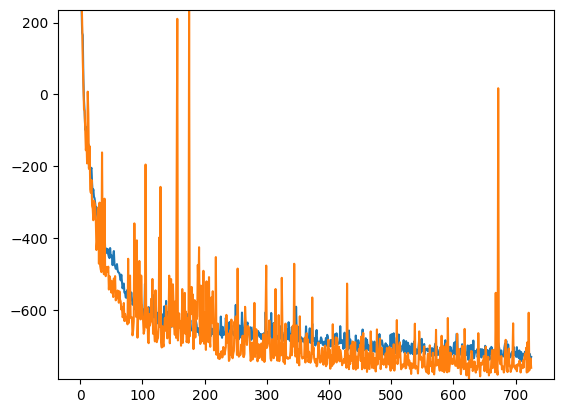

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([min(min(train_curve1),min(valid_curve1) ), 
          max(max(train_curve1[50:]),max(valid_curve1[50:])) ])
# plt.xlim([50, len(train_curve1)])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 9.41217  validloss 9.75002±0.00000  bestvalidloss 9.75002  last_update 0
train: iter 1  trainloss 8.55211  validloss 8.85270±0.00000  bestvalidloss 8.85270  last_update 0
train: iter 2  trainloss 7.82587  validloss 8.07907±0.00000  bestvalidloss 8.07907  last_update 0
train: iter 3  trainloss 7.22752  validloss 7.43017±0.00000  bestvalidloss 7.43017  last_update 0
train: iter 4  trainloss 6.66921  validloss 6.87376±0.00000  bestvalidloss 6.87376  last_update 0
train: iter 5  trainloss 6.22339  validloss 6.36615±0.00000  bestvalidloss 6.36615  last_update 0
train: iter 6  trainloss 5.81452  validloss 5.93669±0.00000  bestvalidloss 5.93669  last_update 0
train: iter 7  trainloss 5.45400  validloss 5.57120±0.00000  bestvalidloss 5.57120  last_update 0
train: iter 8  trainloss 5.13708  validloss 5.24705±0.00000  bestvalidloss 5.24705  last_update 0
train: iter 9  trainloss 4.85251  validloss 4.94235±0.00000  bestvalidloss 4.94235  last_update 0
train: iter 10  trai

train: iter 93  trainloss 1.04481  validloss 1.11821±0.00000  bestvalidloss 1.11821  last_update 0
train: iter 94  trainloss 1.04659  validloss 1.11212±0.00000  bestvalidloss 1.11212  last_update 0
train: iter 95  trainloss 1.04365  validloss 1.10817±0.00000  bestvalidloss 1.10817  last_update 0
train: iter 96  trainloss 1.03212  validloss 1.11960±0.00000  bestvalidloss 1.10817  last_update 1
train: iter 97  trainloss 1.01765  validloss 1.09459±0.00000  bestvalidloss 1.09459  last_update 0
train: iter 98  trainloss 1.03505  validloss 1.10799±0.00000  bestvalidloss 1.09459  last_update 1
train: iter 99  trainloss 1.01343  validloss 1.08877±0.00000  bestvalidloss 1.08877  last_update 0
train: iter 100  trainloss 1.02081  validloss 1.07820±0.00000  bestvalidloss 1.07820  last_update 0
train: iter 101  trainloss 1.02168  validloss 1.10754±0.00000  bestvalidloss 1.07820  last_update 1
train: iter 102  trainloss 1.02487  validloss 1.11206±0.00000  bestvalidloss 1.07820  last_update 2
train: 

train: iter 177  trainloss 0.98956  validloss 1.06999±0.00000  bestvalidloss 1.05595  last_update 26
train: iter 178  trainloss 0.99328  validloss 1.10566±0.00000  bestvalidloss 1.05595  last_update 27
train: iter 179  trainloss 0.98071  validloss 1.09031±0.00000  bestvalidloss 1.05595  last_update 28
train: iter 180  trainloss 0.95983  validloss 1.10411±0.00000  bestvalidloss 1.05595  last_update 29
train: iter 181  trainloss 0.98209  validloss 1.14214±0.00000  bestvalidloss 1.05595  last_update 30
train: iter 182  trainloss 0.99250  validloss 1.13251±0.00000  bestvalidloss 1.05595  last_update 31
train: iter 183  trainloss 0.97474  validloss 1.09084±0.00000  bestvalidloss 1.05595  last_update 32
train: iter 184  trainloss 0.96909  validloss 1.10242±0.00000  bestvalidloss 1.05595  last_update 33
train: iter 185  trainloss 0.95421  validloss 1.12035±0.00000  bestvalidloss 1.05595  last_update 34
train: iter 186  trainloss 0.99239  validloss 1.15338±0.00000  bestvalidloss 1.05595  last_

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([ 4.1829, -0.8126], requires_grad=True)


In [ ]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 13.56270  validloss 19.05753±0.00000  bestvalidloss 19.05753  last_update 0
train: iter 1  trainloss 7.38508  validloss 10.75205±0.00000  bestvalidloss 10.75205  last_update 0
train: iter 2  trainloss 4.64278  validloss 5.65550±0.00000  bestvalidloss 5.65550  last_update 0
train: iter 3  trainloss 3.58096  validloss 3.60660±0.00000  bestvalidloss 3.60660  last_update 0
train: iter 4  trainloss 3.13072  validloss 2.43010±0.00000  bestvalidloss 2.43010  last_update 0
train: iter 5  trainloss 2.85322  validloss 1.84143±0.00000  bestvalidloss 1.84143  last_update 0
train: iter 6  trainloss 2.71012  validloss 1.52654±0.00000  bestvalidloss 1.52654  last_update 0
train: iter 7  trainloss 2.62996  validloss 1.36657±0.00000  bestvalidloss 1.36657  last_update 0
train: iter 8  trainloss 2.56638  validloss 1.26664±0.00000  bestvalidloss 1.26664  last_update 0
train: iter 9  trainloss 2.53720  validloss 1.19561±0.00000  bestvalidloss 1.19561  last_update 0
train: iter 10 

train: iter 83  trainloss 1.59801  validloss 0.92366±0.00000  bestvalidloss 0.78758  last_update 4
train: iter 84  trainloss 1.60626  validloss 0.83681±0.00000  bestvalidloss 0.78758  last_update 5
train: iter 85  trainloss 1.58826  validloss 0.94214±0.00000  bestvalidloss 0.78758  last_update 6
train: iter 86  trainloss 1.63547  validloss 0.87971±0.00000  bestvalidloss 0.78758  last_update 7
train: iter 87  trainloss 1.58966  validloss 0.88017±0.00000  bestvalidloss 0.78758  last_update 8
train: iter 88  trainloss 1.59765  validloss 0.88559±0.00000  bestvalidloss 0.78758  last_update 9
train: iter 89  trainloss 1.60323  validloss 0.80695±0.00000  bestvalidloss 0.78758  last_update 10
train: iter 90  trainloss 1.59855  validloss 0.80078±0.00000  bestvalidloss 0.78758  last_update 11
train: iter 91  trainloss 1.56869  validloss 0.85230±0.00000  bestvalidloss 0.78758  last_update 12
train: iter 92  trainloss 1.61320  validloss 0.86395±0.00000  bestvalidloss 0.78758  last_update 13
train:

In [ ]:

vi.save(ckpt_key="unweighted")

In [ ]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))